In [74]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn import datasets
from subprocess import check_output

# Loading data

In [75]:
df= pd.read_csv('/Users/akilar/Downloads/wine.csv',names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [76]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data Exploration

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [78]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


From the above data analysis it is evident that al are numerical data

In [80]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

# Preprocessing

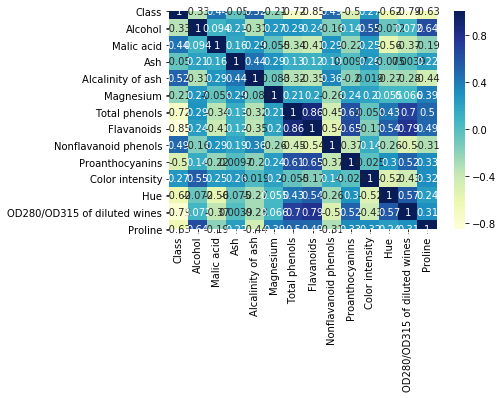

In [81]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [82]:
# by looking at the heatmap we can understand that ash is the least correlated hence dropping it th

In [83]:
x= df.drop(['Class'], axis=1)

In [84]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
y=df.iloc[:,:1]


Train test split

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)

(124, 13)
(54, 13)


# PCA

In [87]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
pca.fit(x)
transformed=pca.transform(x)

In [88]:
transformed

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [89]:
pca.explained_variance_

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

In [90]:
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

<BarContainer object of 13 artists>

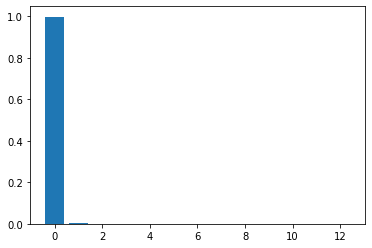

In [91]:
import matplotlib.pyplot as plt
plt.bar(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)

In [92]:
pca_df=pd.DataFrame(transformed)

In [93]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


# Cumulative Variance

In [150]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.9980912304918974, 0.9998271461166032, 0.9999221050741547, 0.9999723224303368, 0.9999846861150248, 0.99999314824536, 0.9999959550599171, 0.9999974781404499, 0.9999986059708892, 0.9999993273867, 0.9999997054469666, 0.9999999174607211, 1.0]


<BarContainer object of 13 artists>

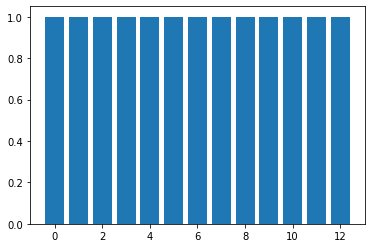

In [95]:
import matplotlib.pyplot as plt
plt.bar(range(len(cum_explained_var)),cum_explained_var)

In [96]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

#xtrain,xtest,ytrain,ytest= train_test_split(transformed,y,test_size=0.3,random_state=0)
#lr=LinearRegression()
#lr.fit(xtrain,ytrain)




# Building model for pca dataset

In [97]:
from sklearn.linear_model import LogisticRegression

xtrain, xtest, ytrain, ytest = train_test_split(transformed, y, test_size=0.3, random_state=0)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predictions=lr.predict(xtest)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [98]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [99]:
accuracy_score(ytest,predictions)

0.9629629629629629

In [100]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      0.95      0.95        22
           3       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



The f1-score for the dataset which was the outcome of pca is good

In [101]:
#ypred=lr.predict(xtest)

In [102]:
#from sklearn.metrics import mean_squared_error

In [103]:
#ypred.shape

In [104]:
#mean_squared_error(ytest,ypred)

In [105]:
#Train accuracy

In [106]:
#lr.score(xtrain,ytrain)

In [107]:
#Test accuracy

In [108]:
#lr.score(xtest,ytest)

In [109]:
#Building model with original dataset

In [110]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#lr_orig=LinearRegression()
#lr_orig.fit(x_train,y_train)

# Building model with original dataset

In [111]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr_orig=LogisticRegression()
lr_orig.fit(xtrain,ytrain)
predictions_orig=lr.predict(x_test)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [113]:
print(classification_report(y_test,predictions_orig))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.41      1.00      0.58        22
           3       0.00      0.00      0.00        13

    accuracy                           0.41        54
   macro avg       0.14      0.33      0.19        54
weighted avg       0.17      0.41      0.24        54



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The f1-score for the f1-score of original dataset is poor.

 The f1-score for the dataset which was the outcome of pca is good whereas the f1-score of original dataset is poor.
 
 
 f1-score: Harmonic mean of precision and recall.
 
 f1-score = 2((precision*recall)/(precision+recall))

# Classifier Models for original dataset

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)

(124, 13)
(54, 13)


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
#models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [116]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,x_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-package

Logistic Regression: 95.96153846153845
Naive Bayes: 96.02564102564102
K-Nearest Neighbour: 71.92307692307692
Decision Tree: 87.94871794871796
Support Vector Machine-linear: 96.02564102564102
Support Vector Machine-rbf: 42.37179487179487
Random Forest: 94.48717948717949
MLP: 28.205128205128204
AdaBoostClassifier: 89.42307692307693
GradientBoostingClassifier: 93.65384615384616


In [117]:
# ROC curves for original dataset

In [118]:
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [119]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,
                                                    random_state=0)

In [121]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=1)  )
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [122]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [123]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [124]:
#Plot of a ROC curve for a specific class

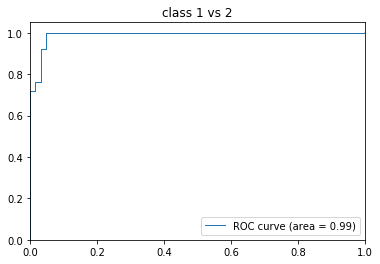

In [125]:






plt.figure()
lw= 1
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([1, 2], [1, 2], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 1 vs 2')
plt.legend(loc="lower right")
plt.show()


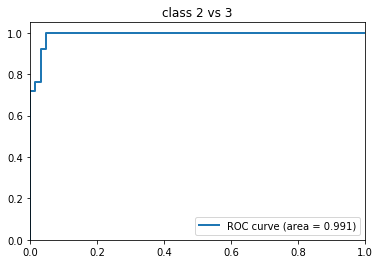

In [126]:
plt.figure()
lw= 2
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([2, 3], [2, 3])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 2 vs 3')
plt.legend(loc="lower right")
plt.show()



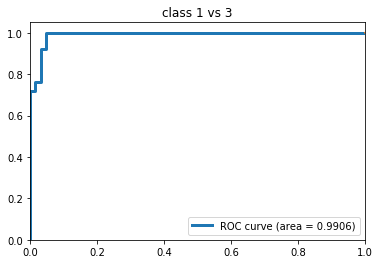

In [127]:
plt.figure()
lw= 3
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([3, 1], [3, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 1 vs 3')
plt.legend(loc="lower right")
plt.show()




In [128]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [129]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  after removing the cwd from sys.path.


In [130]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

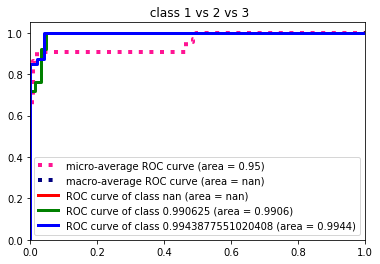

In [131]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {1} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([1, 2], [1, 2], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title(' class 1 vs 2 vs 3')
plt.legend(loc="lower right")
plt.show()

In [132]:
# ROC curves for pca dataset

In [133]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [134]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(pca_df, y, test_size=.5,
                                                    random_state=0)

In [135]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=1)  )
y_score = classifier.fit(X_train1, y_train1).decision_function(X_test1)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [136]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [137]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [138]:
#Plot of a ROC curve for class 1 vs 2

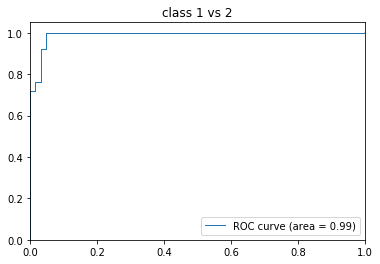

In [139]:






plt.figure()
lw= 1
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([1, 2], [1, 2], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 1 vs 2')
plt.legend(loc="lower right")
plt.show()



In [140]:
#Plot of a ROC curve for class 2 vs 3

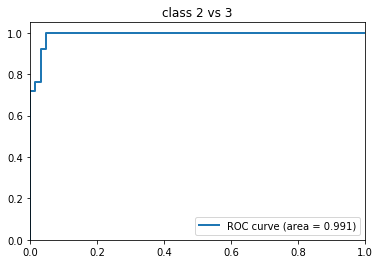

In [141]:
plt.figure()
lw= 2
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([2, 3], [2, 3])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 2 vs 3')
plt.legend(loc="lower right")
plt.show()




In [142]:
#Plot of a ROC curve for class 1 vs 3

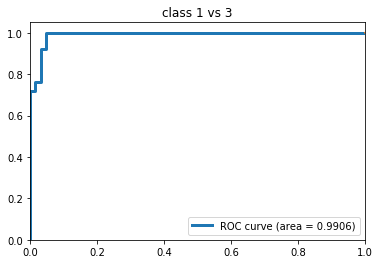

In [143]:
plt.figure()
lw= 3
plt.plot(fpr[1], tpr[1],
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([3, 1], [3, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('class 1 vs 3')
plt.legend(loc="lower right")
plt.show()





In [144]:
# roc curve for all classes

In [145]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

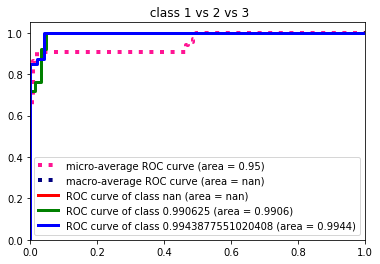

In [146]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {1} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([1, 2], [1, 2], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title(' class 1 vs 2 vs 3')
plt.legend(loc="lower right")
plt.show()